In [3]:
import numpy as np
from gen_result import plotPerformance
import seaborn as sns

working on 0.00


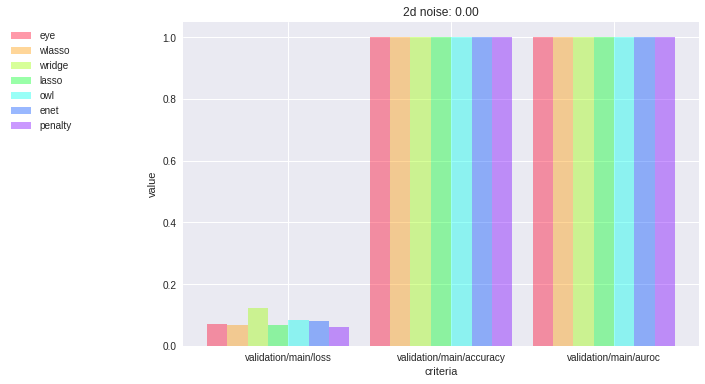

working on 0.22


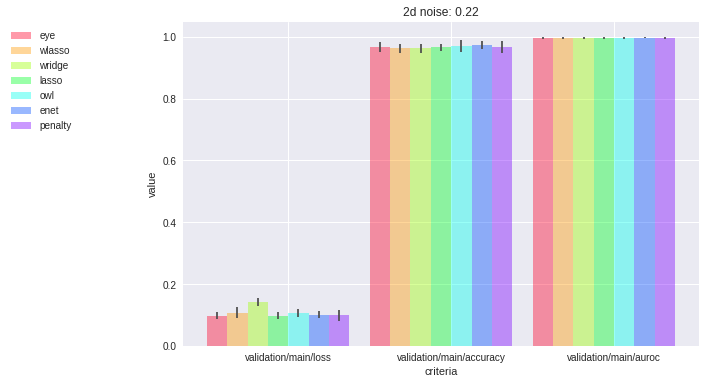

working on 0.44


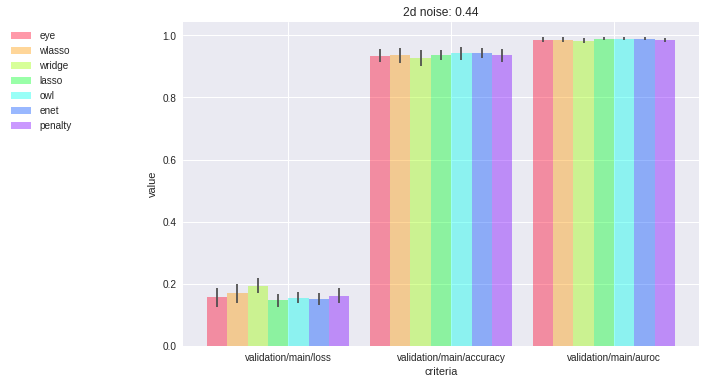

working on 0.67


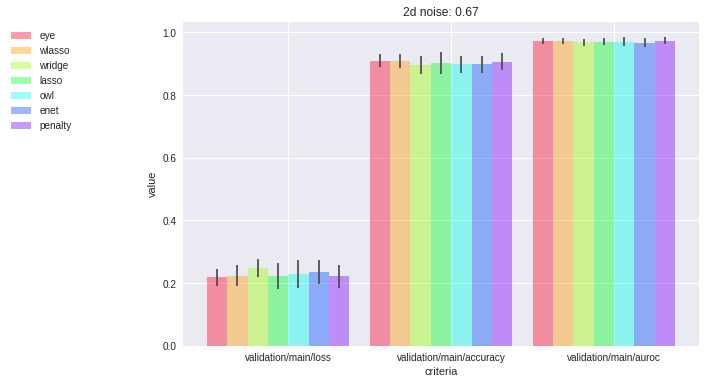

working on 0.89


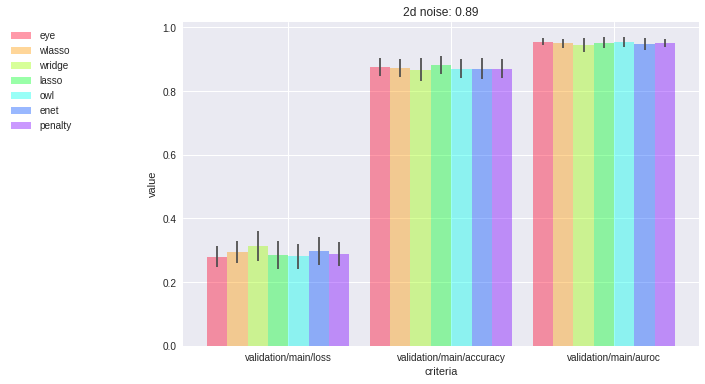

working on 1.11


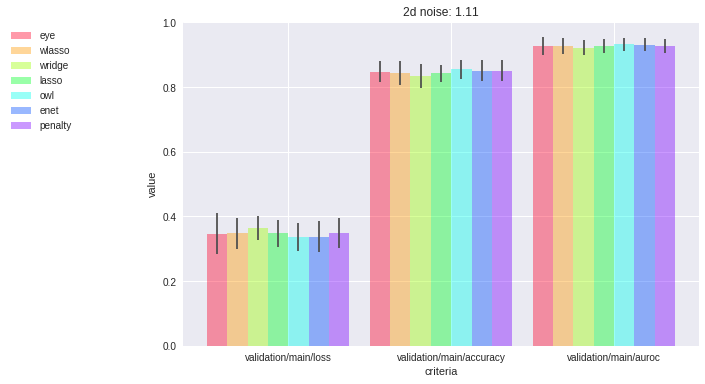

working on 1.33


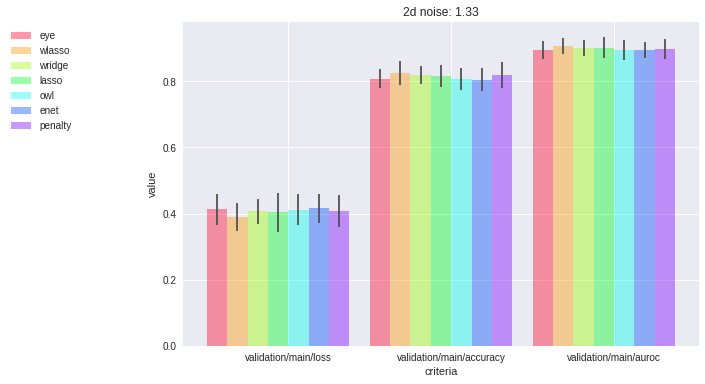

working on 1.56


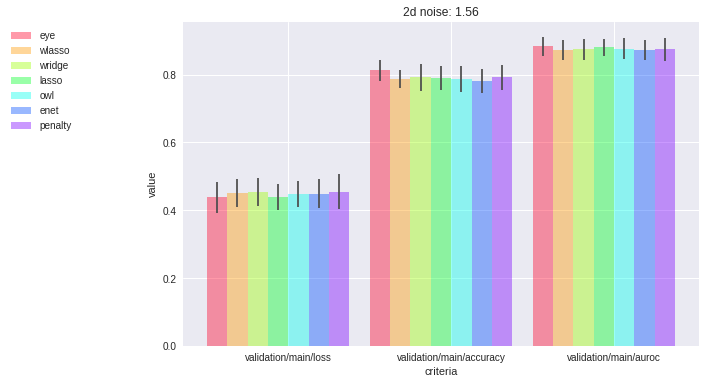

working on 1.78


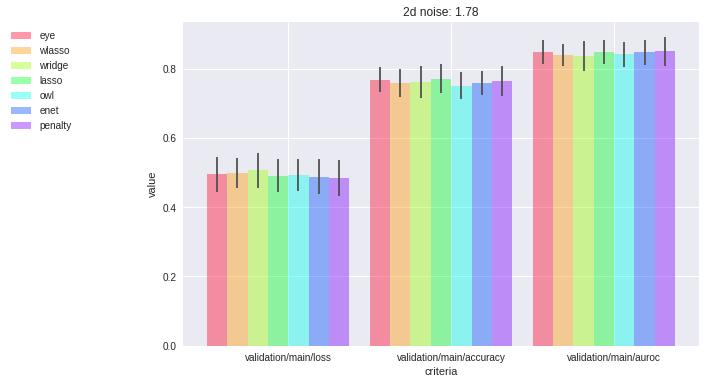

working on 2.00


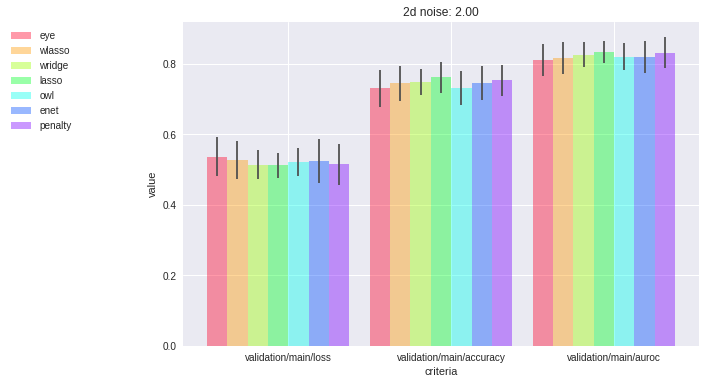

In [5]:
noise_levels = np.linspace(0,2,10)
for s in noise_levels:
    print("working on %.2f" % s)
    plotPerformance(basedir="noise2d/noise%.2f/0" % s, title="2d noise: %0.2f" % s)

In [8]:
from gen_result import regs
import os
import numpy as np
noise_levels = np.linspace(0,2,10)
basedir = "noise2d/"

def noise_mean_heatmap(regs=regs,feature=0): 
    heatmap = []
    for m in regs:         
        row =[]
        for s in noise_levels:
            data = np.load(os.path.join(basedir,
                                        "noise%.2f/0" % s,
                                        "result_%s" % m,
                                        "theta.npy"))
            data = data[np.isfinite(data).all(axis=1)]
            row.append(data[:,feature].mean())
        heatmap.append(row)
    return np.array(heatmap)

def noise_ratio_heatmap(regs=regs): 
    heatmap = []
    for m in regs:
        row =[]
        for s in noise_levels:
            data = np.load(os.path.join(basedir,
                                        "noise%.2f/0" % s,
                                        "result_%s" % m,
                                        "theta.npy"))
            data = data[np.isfinite(data).all(axis=1)]
            row.append(np.abs(data[:
                                   ,0]/data[:,1]).mean())
        heatmap.append(row)
    return np.array(heatmap)


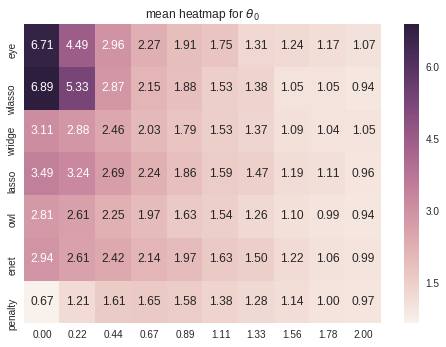

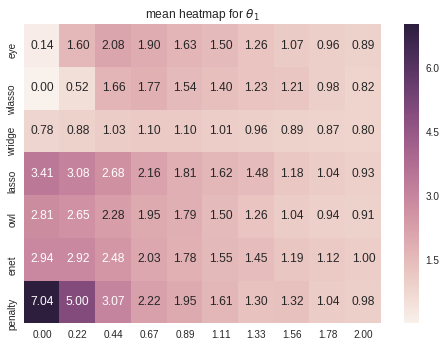

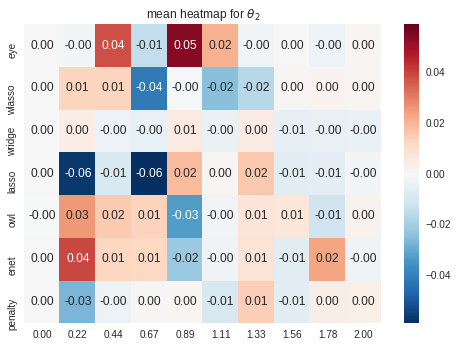

In [9]:
for i in range(3):
    heatmap = noise_mean_heatmap(feature=i)
    ax = sns.heatmap(heatmap, annot=True, fmt=".2f", cbar=True, yticklabels=regs, 
                     xticklabels=list(map(lambda x: "%.2f" % x, noise_levels)))
    sns.plt.title(r"mean heatmap for $\theta_%d$" % i)
    sns.plt.show()

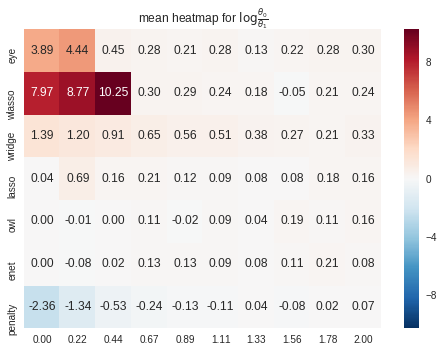

In [10]:
heatmap = np.log(noise_ratio_heatmap())
ax = sns.heatmap(heatmap, annot=True, fmt=".2f", cbar=True, yticklabels=regs, 
                 xticklabels=list(map(lambda x: "%.2f" % x, noise_levels)))
sns.plt.title(r"mean heatmap for $\log{\frac{\theta_0}{\theta_1}}$")
sns.plt.show()

# diff theta experiment

0.468861032128334


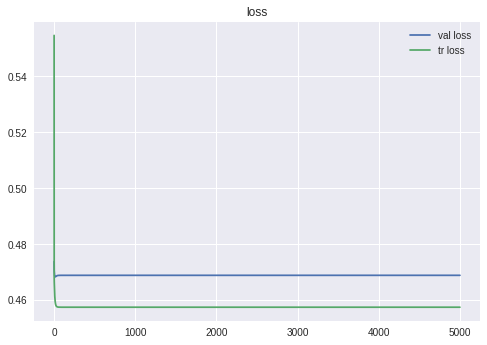

3.7350313663482666


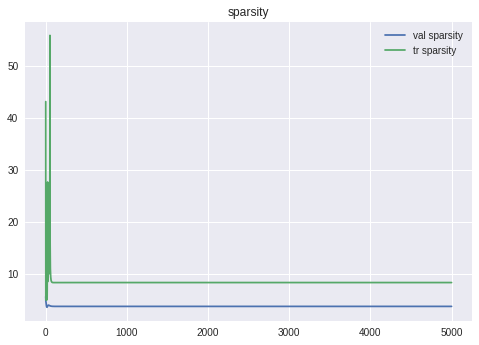

0.7768


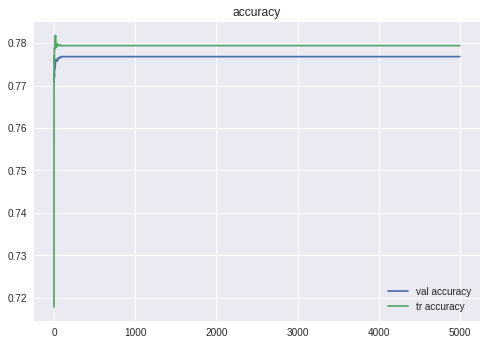

In [13]:
import plotResult
plotResult.plotResult("diff_theta/default/1/result_wridge/log_0", save=False, criteria="loss")
plotResult.plotResult("diff_theta/default/1/result_wridge/log_0", save=False, criteria="sparsity")
plotResult.plotResult("diff_theta/default/1/result_wridge/log_0", save=False, criteria="accuracy")